# Experimental Design
## Iteration I: Initial Study Draft
To determine the appropriate experimental design for comparing manual and eNest assisted monitoring of bird nest boxes, I investigated two statistical methods with power analyses. I considered a series of independent t-tests with a Bonferroni correction to address for multiple comparisons or using a Multivariate Analysis of Variance (MANOVA). I am interested in Bayesian and computational inference, but decided to focus on parametric statistical options for the purpose of study design.

I used the Python StatsModels module and [G\*Power](http://www.psychologie.hhu.de/arbeitsgruppen/allgemeine-psychologie-und-arbeitspsychologie/gpower.html) to run *a priori* power analyses for both an independent two sample t-test and a MANOVA to generate sample size, power, and effect data. The Type I error rate (alpha level) is set at the standard 0.05. Effect size for the t-test is represented by Cohen's *d* (small = 0.20, medium = 0.50, and large = 0.80), and for the MANOVA is Cohen's *f<sup>2</sup>* (small = (0.10)<sup>2</sup> = 0.01, medium = (0.25)<sup>2</sup> = 0.06, and large = (0.40)<sup>2</sup> = 0.16).

For both t-tests and MANOVA, there are certain assumptions that need to be met. All efforts will be made to meet independence and randomization. Samples will be equal but the variances might be unequal so I might need to use Welch's t-test. I don't know if the dependent variables will be normally distributed or if the population covariance matrices will be equal for each group. The major difference between MANOVA and a series of t-tests, is that for a MANOVA, the dependent variables make up a vector that represents the effects of each group on a continuous outcome, so I can compare the monitoring methods in aggregate, and look at interactions between dependent variables. Because the MANOVA incorporates multicollinearity, it will require a larger sample size. The hypothesis test with the MANOVA is:

*H<sub>0</sub>*: There is no difference between nest observations recorded by manual and eNest assisted monitoring. <br>
*H<sub>A</sub>*: There is a difference between nest observations recorded by manual and eNest assisted monitoring.


With t-tests I will only be able to speak about significance in terms of each specific nest observation.  Hypothesis tests for a series of t-tests will follow the generalized pattern:

*H<sub>0</sub>*: There is no difference between *\[specific nest observation\]* recorded by manual and eNest assisted monitoring. <br>
*H<sub>A</sub>*: There is a difference between *\[specific nest observation\]* recorded by manual and eNest assisted monitoring.

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import seaborn as sns

%matplotlib inline

In [3]:
# import data
pa_df = pd.read_excel("power_analysis_data.xlsx")
pa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 10 columns):
sample_size    298 non-null int64
m14_s          298 non-null float64
m14_m          298 non-null float64
m14_l          298 non-null float64
m7_s           298 non-null float64
m7_m           298 non-null float64
m7_l           298 non-null float64
t_s            298 non-null float64
t_m            298 non-null float64
t_l            298 non-null float64
dtypes: float64(9), int64(1)
memory usage: 23.4 KB


Data is imported correctly. For reference, m14 is a MANOVA test with 2 groups and 14 dependent variables, m7 is a MANOVA test with 7 dependent variables, the letter after the underscore denotes effect size (s = small, m = medium, l = large), and the t stands for independent t-test.<br><br>
Next, I graphed the power analysis for the full MANOVA (2 groups, 14 variables) and independent t-test to visually compare.

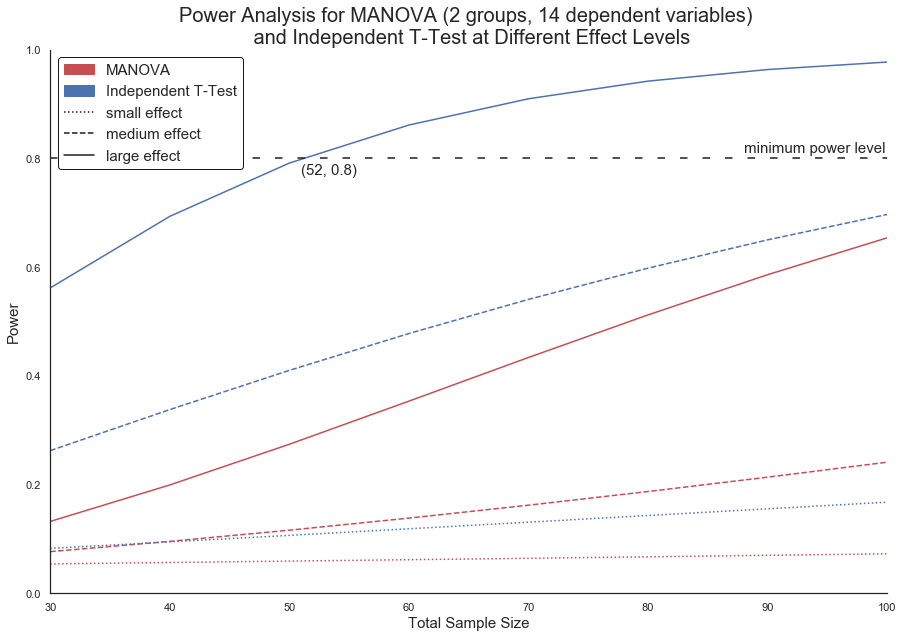

In [363]:
legend_elements = [Patch(facecolor = "r", edgecolor = "r", label = "MANOVA"),
                  Patch(facecolor = "b", edgecolor = "b", label = "Independent T-Test"),
                  Line2D([0], [0], linestyle = ":", color = "k", label = "small effect"),
                  Line2D([0], [0], linestyle = "--", color = "k", label = "medium effect"),
                  Line2D([0], [0], linestyle = "-", color = "k", label = "large effect")]

sns.set()
sns.set_style("white", {"xtick.bottom":False, "ytick.left":False})
plt.figure(figsize=(15,10))
plt.plot(pa_df.sample_size, pa_df.m14_s, color = 'r', linestyle = ":", label = "MANOVA small effect")
plt.plot(pa_df.sample_size, pa_df.m14_m, color = 'r', linestyle = "--", label = "MANOVA medium effect")
plt.plot(pa_df.sample_size, pa_df.m14_l, color = 'r', linestyle = "-", label = "MANOVA large effect")
plt.plot(pa_df.sample_size, pa_df.t_s, color = 'b', linestyle = ":", label = "Independent T-Test small effect")
plt.plot(pa_df.sample_size, pa_df.t_m, color = 'b', linestyle = "--", label = "Independent T-Test medium effect")
plt.plot(pa_df.sample_size, pa_df.t_l, color = 'b', linestyle = "-", label = "Independent T-Test large effect")
plt.axhline(y = 0.8, color = "k", linestyle = (0, (5, 10)))
plt.title("Power Analysis for MANOVA (2 groups, 14 dependent variables) \n and Independent T-Test at Different Effect Levels", fontsize="20")
sns.despine()
plt.ylim(0, 1)
plt.xlim(30, 100)
plt.text(88, 0.81, 'minimum power level', fontsize = "15")
plt.text(51, 0.77, "(52, 0.8)", fontsize = "15")
plt.xlabel("Total Sample Size", fontsize = "15")
plt.ylabel("Power", fontsize = "15")
plt.legend(handles = legend_elements, frameon = True, fontsize = "15",
           loc = "upper left", facecolor = "w", framealpha = 1, edgecolor = "k")
plt.show()

It's clear that with my sample size limitations, I will only be able to detect large effects with a series of independent t-tests. <br><br>From testing out different numbers of dependent variables for a MANOVA, if I can cut down that number to 7, I will be able to see large effects with a total sample size at 98.

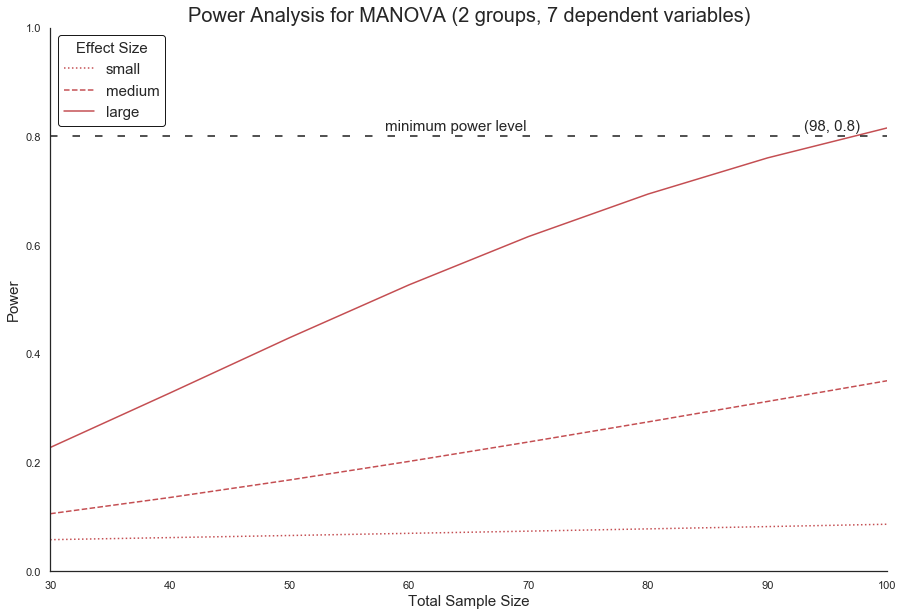

In [361]:
sns.set()
sns.set_style("white", {"xtick.bottom":False, "ytick.left":False})
plt.figure(figsize=(15,10))
plt.plot(pa_df.sample_size, pa_df.m7_s, color = 'r', linestyle = ":", label = "small")
plt.plot(pa_df.sample_size, pa_df.m7_m, color = 'r', linestyle = "--", label = "medium")
plt.plot(pa_df.sample_size, pa_df.m7_l, color = 'r', linestyle = "-", label = "large")
plt.axhline(y = 0.8, color = "k", linestyle = (0, (5, 10)))
plt.title("Power Analysis for MANOVA (2 groups, 7 dependent variables)", fontsize="20")
sns.despine()
plt.ylim(0, 1)
plt.xlim(30, 100)
plt.text(58, 0.81, 'minimum power level', fontsize = "15")
plt.text(93, 0.81, "(98, 0.8)", fontsize = "15")
plt.xlabel("Total Sample Size", fontsize = "15")
plt.ylabel("Power", fontsize = "15")
plt.legend(frameon = True, fontsize = "15", title = "Effect Size", title_fontsize = "15",
           loc = "upper left", facecolor = "w", framealpha = 1, edgecolor = "k")
plt.show()

To put things into perspective, I investigated what sample sizes I would need for a MANOVA (2 groups, 14 dependent variables) or independent t-test to reach an 0.8 power level at small, medium, and large effects.

In [236]:
min_power = {"effect_size":["small", "medium", "large"], "manova":[1846, 318, 127], "t_test":[787, 128, 52]}
min_power_df = pd.DataFrame(data = min_power)
min_power_df

,effect_size,manova,t_test
0,small,1846,787
1,medium,318,128
2,large,127,52


Based on these *a priori* power analyses, I could do a series of independent t-tests that can detect large effects with a total sample size of 52. The other option is to decrease the number of dependent variables equal to 7 with a total sample size of 98. All of the dependent variables seem important, and getting a total sample of 98 might be challenging. I recommend going with the series of independent t-tests and using the Bonferroni correction to account for multiple comparisons. It would also be worthwhile to investigate alternative statistical analysis methods using Bayesian and computationally intensive methods.

## Iteration II: Revised Study Draft Options
I received some feedback on my initial study draft that prompted me to change the study design. First, from looking at the NestWatch data sheet, the number of dependent variables can be reduced to 7, they are:
* first egg date
* hatch date
* fledge date
* clutch size
* unhatched eggs
* live young
* fledglings

Because I'm interested in studying the data collection method, looking at both data accurracy and observer impact is conflicting. Data accuracy holds the eNest observations as true and looks at how well manual observations match up, which makes it necessary to have both eNest and manual data collection happening in the same nest. Having both data collection methods for the same nest, however, eliminates any ability to determine differences in observation impact. It is expected that there will be a lot of variation between nests and volunteers, which would be controlled if both data collection samples were used per nest. What might be possible, would be 3 treatments: manual, eNest, and manual with eNest. The statistical analysis for these options would be as follows:
1. manual and eNest data collection on same nest <br>
a. MANOVA with repeated measures, within factors, 2 groups, 7 dependent variables (to compare in aggregate) <br>
b. dependent t-tests with Bonferroni correction (to compare at each dependent variable)
2. manual, eNest, and manual with eNest data collection on different nests <br>
a. MANOVA, global effects, 3 groups, 7 dependent variables (to compare in aggregate)